## AI News Sentiment Analyser

In [1]:
# Importing Packages

import requests
import pandas as pd
import os

from dotenv import load_dotenv
from datetime import datetime,timedelta
from transformers import pipeline
import matplotlib.pyplot as plt

c:\Users\ADMIN\anaconda3\envs\rvm-env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\rvm-env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\rvm-env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode

In [2]:
# Loading variables from .env
load_dotenv()

api_key = os.getenv('NEWS_API_KEY')

# Fetching news from last month
from_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
url = f"https://newsapi.org/v2/everything?q=ai&from={from_date}&language=en&sortBy=publishedAt&apiKey={api_key}"

response = requests.get(url)

# Data in form of json
data = response.json()

articles = data["articles"]

# Storing article details in a dataframe
df = pd.DataFrame(articles)[["title","description","publishedAt"]]
df.sample(10)

,title,description,publishedAt
48,Google Says AI-Generated Content Should Be Hum...,Google's Gary Illyes said that AI-generated co...,2025-08-12T08:54:16Z
31,How to Get Rid of Spam Calls on iPhone (The Co...,Are you tired of spam and robocalls disrupting...,2025-08-12T09:00:15Z
20,Elon Musk says he plans to sue Apple for not f...,"Billionaire SpaceX, Tesla and X owner Elon Mus...",2025-08-12T09:03:36Z
52,Elon Musk threatens to sue Apple over app stor...,Elon Musk said his artificial intelligence sta...,2025-08-12T08:50:50Z
14,Show HN: OmniHuman-1: AI Turns a Photo into Li...,Omnihuman 1 is a revolutionary AI system that ...,2025-08-12T09:10:37Z
80,LHV streamlines legal document processing with...,UK bank LHV is to apply artificial intelligenc...,2025-08-12T08:22:35Z
16,Japan's NTT Data ties up with Google for AI ag...,Japan's NTT Data ties up with Google for AI ag...,2025-08-12T09:06:19Z
57,AI Boom Makes SoftBank’s Masayoshi Son Richest...,SoftBank Group founder Masayoshi Son reclaimed...,2025-08-12T08:47:34Z
13,China urges local firms not to use Nvidia's H2...,China urges local firms not to use Nvidia's H2...,2025-08-12T09:12:22Z
54,She runs a team of philosophers and artists at...,"Mira Lane, who founded Google's Envisioning St...",2025-08-12T08:50:02Z


I've fetched the news using the news API and displayed the title,description of articles together with when they were published.

#### Running the Sentiment Analysis using a model from Hugging Face

In [3]:
# Using a pipeline
sentiment_pipeline = pipeline("sentiment-analysis",model="jerryfr/finetuning-sentiment-model-distillBert_epochs_2")

Device set to use cpu


In [4]:
df.head(2)

,title,description,publishedAt
0,Morgan Stanley sees 3 things that could break ...,Morgan Stanley's wealth management CIO predict...,2025-08-12T09:15:02Z
1,US Hits Highest Layoffs Since COVID,Layoffs in the U.S. have hit their highest lev...,2025-08-12T09:14:15Z


In [ ]:
# Adding the columns sentiment(positive,negative) and score to the dataframe

df['sentiment'] = df['title'].apply(lambda x: sentiment_pipeline(x)[0]["label"])
df['score'] = df['title'].apply(lambda x:sentiment_pipeline(x)[0]["score"])

df.head()

,title,description,publishedAt,sentiment,score
0,Morgan Stanley sees 3 things that could break ...,Morgan Stanley's wealth management CIO predict...,2025-08-12T09:15:02Z,LABEL_1,0.596672
1,US Hits Highest Layoffs Since COVID,Layoffs in the U.S. have hit their highest lev...,2025-08-12T09:14:15Z,LABEL_1,0.931838
2,craft-ai-sdk 0.66.0rc1,Craft AI MLOps platform SDK,2025-08-12T09:14:08Z,LABEL_0,0.823846
3,Easy Claude Code ChatGPT 5 MCP Server Setup to...,Have you ever wished for a development workflo...,2025-08-12T09:13:52Z,LABEL_1,0.742040
4,Which Artificial Intelligence (AI) Stock Is Mo...,Which Artificial Intelligence (AI) Stock Is Mo...,2025-08-12T09:13:31Z,LABEL_0,0.767344


Label 0 - Negative

Label 1 - Positive

#### Changing the labels

In [6]:
label_map = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Positive'
}

df["sentiment"] = df["sentiment"].map(label_map)


In [7]:
df

,title,description,publishedAt,sentiment,score
0,Morgan Stanley sees 3 things that could break ...,Morgan Stanley's wealth management CIO predict...,2025-08-12T09:15:02Z,Positive,0.596672
1,US Hits Highest Layoffs Since COVID,Layoffs in the U.S. have hit their highest lev...,2025-08-12T09:14:15Z,Positive,0.931838
2,craft-ai-sdk 0.66.0rc1,Craft AI MLOps platform SDK,2025-08-12T09:14:08Z,Negative,0.823846
3,Easy Claude Code ChatGPT 5 MCP Server Setup to...,Have you ever wished for a development workflo...,2025-08-12T09:13:52Z,Positive,0.742040
4,Which Artificial Intelligence (AI) Stock Is Mo...,Which Artificial Intelligence (AI) Stock Is Mo...,2025-08-12T09:13:31Z,Negative,0.767344
...,...,...,...,...,...
94,stum-ai-gateway 0.1.8,NatBus-to-LLM agent gateway (contract-validate...,2025-08-12T08:05:44Z,Negative,0.887731
95,audioprep 1.1.5,"AI audio preparation tools, including audio tr...",2025-08-12T08:05:10Z,Positive,0.763109
96,Virology and Bacteriology Business Analysis Re...,The Virology and Bacteriology market is poised...,2025-08-12T08:05:00Z,Positive,0.960826
97,Vitiligo Treatment Strategic Market Research R...,Key market opportunities for vitiligo treatmen...,2025-08-12T08:04:00Z,Positive,0.944971


### Visualizing the Sentiments

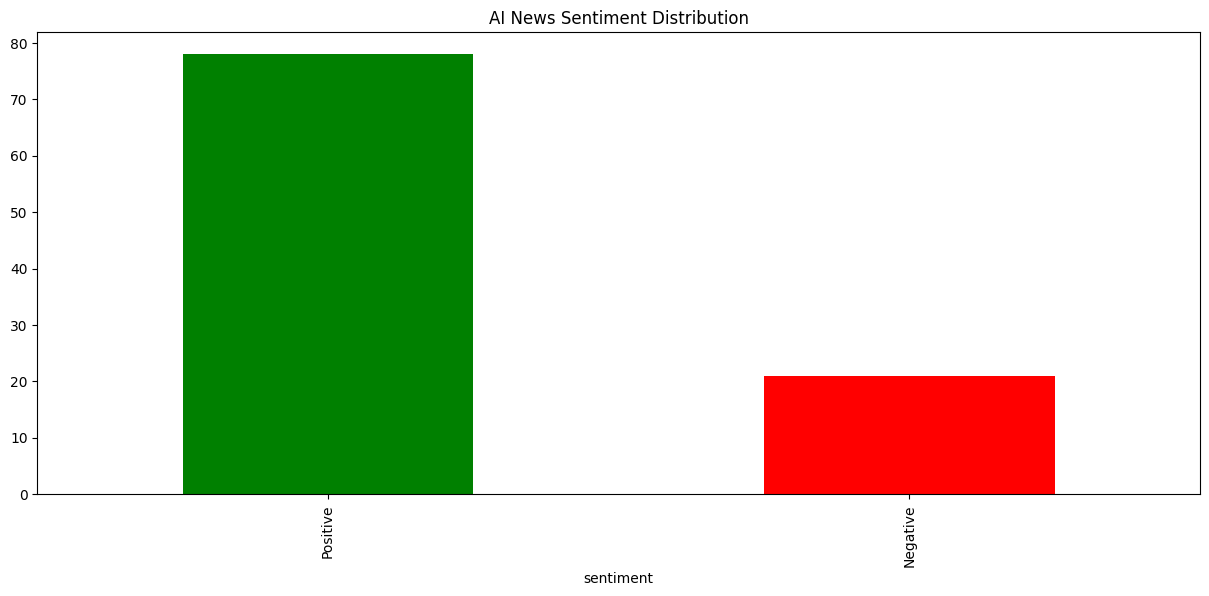

In [8]:
sentiment_count = df["sentiment"].value_counts()

plt.figure(figsize=(15,6))
sentiment_count.plot(kind="bar",color=['Green','Red'])
plt.title("AI News Sentiment Distribution")
plt.show()

From the above bar plot,most sentiments on AI-related topics are positive(70%)


### Word Cloud

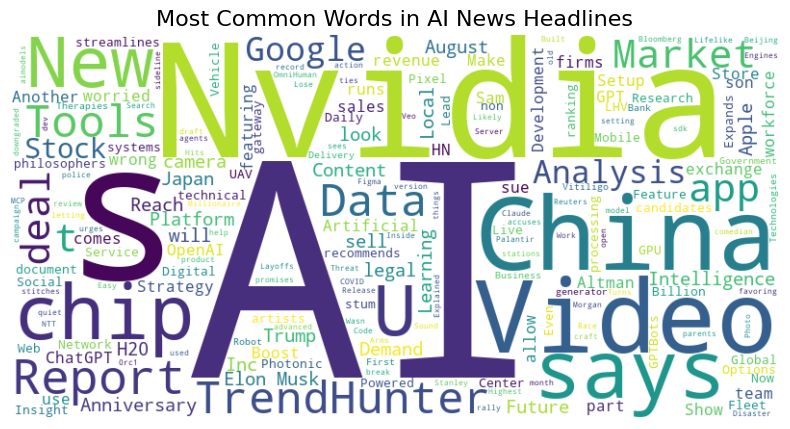

In [9]:
from wordcloud import WordCloud

text = " ".join(df['title'])

wc = WordCloud(width=800,height=400,background_color='white').generate(text)


plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in AI News Headlines", fontsize=16)
plt.show()


The above wordcloud is showing what has been trending the past one month in AI .Example,GPT,Stocks,NVIDIA